# Visualisierung molekularer Daten und Strukturen mit RDKit und py3Dmol

#### RDKit importieren und installieren

RDKit in Python:
    https://www.rdkit.org/docs/GettingStartedInPython.html

RDKit Cookbook:
    https://www.rdkit.org/docs/Cookbook.html
    

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem

#### py3Dmol installieren und importieren:

Viewer: py3Dmol 
    https://pypi.org/project/py3Dmol/
    

py3Dmol Tuturial:
    https://colab.research.google.com/drive/1T2zR59TXyWRcNxRgOAiqVPJWhep83NV_?usp=sharing#scrollTo=0N6PEYCyGx5g



In [2]:
import py3Dmol

## RDKit: Darstellungen und Koordinaten von Molekülen aus Identifikatoren generieren

#### Darstellungen von Molekülen aus SMILES und InChI generieren

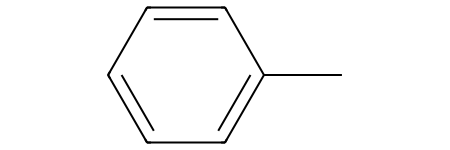

In [3]:
# Generate Molecule from SMILES: Example Toluene
ex1 = Chem.MolFromSmiles('Cc1ccccc1')
ex1

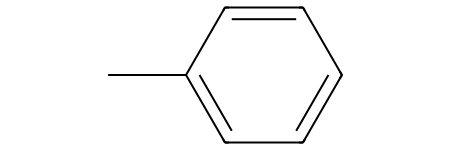

In [4]:
# generate Example 1 (Toluene) from InChI
ex1_i = Chem.MolFromInchi('InChI=1S/C7H8/c1-7-5-3-2-4-6-7/h2-6H,1H3')
ex1_i

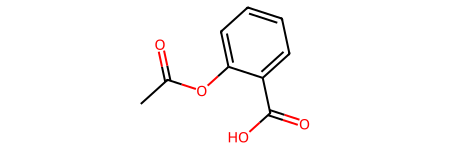

In [5]:
# Generate Molecule from SMILES: Example aspirin
ex2 = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O')
ex2

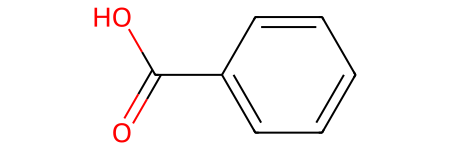

In [6]:
# Generate Molecule from SMILES example Benzoic acid
ex3 = Chem.MolFromSmiles('C1=CC=C(C=C1)C(=O)O')
ex3

#### Eigenschaften der Moleküle bekommen

In [7]:
# Number of Atoms (Example 3)
n_at = ex3.GetNumAtoms()
print('number of atoms = ', n_at)

number of atoms =  9


In [8]:
# Number of Bonds (Example 3)
n_bonds = ex3.GetNumBonds()
print('number of bonds = ', n_bonds)

number of bonds =  9


In [9]:
# Generate InCHi from molecule 
ex3_inchi = Chem.inchi.MolToInchi(ex3)
print('InChi of molecule = ', ex3_inchi)

InChi of molecule =  InChI=1S/C7H6O2/c8-7(9)6-4-2-1-3-5-6/h1-5H,(H,8,9)


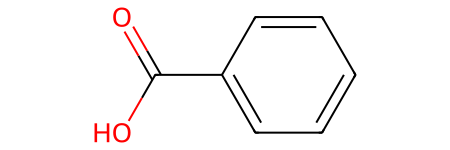

In [10]:
# Regenerate Example 3 (Aspirin) from InChI as a test
ex3_i = Chem.MolFromInchi(ex3_inchi)
ex3_i

#### 3D-Koordinaten eines Moleküls generieren und visualisieren

In [11]:
# Generate coordinates and connectivity
print(Chem.MolToMolBlock(ex3))    


     RDKit          2D

  9  9  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500   -1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  4  7  1  0
  7  8  2  0
  7  9  1  0
  6  1  1  0
M  END



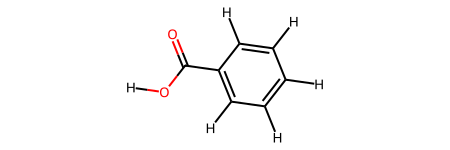

In [12]:
# Add Hydrogens
ex3_H = Chem.AddHs(ex3)
ex3_H

In [13]:
# Generate 3D Coordinates with hydrogens
params = AllChem.ETKDGv3()
params.randomSeed = 0xf00d # optional random seed for reproducibility
AllChem.EmbedMolecule(ex3_H, params)
ex3H_crd = Chem.MolToMolBlock(ex3_H)
print(ex3H_crd)  


     RDKit          3D

 15 15  0  0  0  0  0  0  0  0999 V2000
   -2.2039    0.0764    0.2407 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4378    1.1660   -0.1067 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0728    1.0732   -0.2648 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5867   -0.1396   -0.0767 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1846   -1.2264    0.2707 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5536   -1.1441    0.4317 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0317   -0.2295   -0.2461 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5998   -1.3352   -0.0702 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.8168    0.8558   -0.5949 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.2747    0.1068    0.3744 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9250    2.1153   -0.2577 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.5537    1.9217   -0.5393 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.3608   -2.1653    0.4117 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0836   -2.0353    0

In [14]:
# Visualize with py3Dmol
xyzview = py3Dmol.view(width=400,height=400)
xyzview.addModel(ex3H_crd)
xyzview.setStyle({'stick':{}})
xyzview.zoomTo()
xyzview.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [15]:
# Generate Coordinates in PDB format
print(Chem.MolToPDBBlock(ex3_H,flavor=4))

HETATM    1  C1  UNL     1      -2.204   0.076   0.241  1.00  0.00           C  
HETATM    2  C2  UNL     1      -1.438   1.166  -0.107  1.00  0.00           C  
HETATM    3  C3  UNL     1      -0.073   1.073  -0.265  1.00  0.00           C  
HETATM    4  C4  UNL     1       0.587  -0.140  -0.077  1.00  0.00           C  
HETATM    5  C5  UNL     1      -0.185  -1.226   0.271  1.00  0.00           C  
HETATM    6  C6  UNL     1      -1.554  -1.144   0.432  1.00  0.00           C  
HETATM    7  C7  UNL     1       2.032  -0.229  -0.246  1.00  0.00           C  
HETATM    8  O1  UNL     1       2.600  -1.335  -0.070  1.00  0.00           O  
HETATM    9  O2  UNL     1       2.817   0.856  -0.595  1.00  0.00           O  
HETATM   10  H1  UNL     1      -3.275   0.107   0.374  1.00  0.00           H  
HETATM   11  H2  UNL     1      -1.925   2.115  -0.258  1.00  0.00           H  
HETATM   12  H3  UNL     1       0.554   1.922  -0.539  1.00  0.00           H  
HETATM   13  H4  UNL     1  

In [16]:
# Generate Coordinates in xzy format
print(Chem.MolToXYZBlock(ex3_H))

15

C     -2.203948    0.076429    0.240695
C     -1.437786    1.166042   -0.106668
C     -0.072779    1.073235   -0.264848
C      0.586743   -0.139617   -0.076737
C     -0.184606   -1.226409    0.270666
C     -1.553597   -1.144058    0.431737
C      2.031700   -0.229453   -0.246083
O      2.599756   -1.335154   -0.070240
O      2.816780    0.855799   -0.594927
H     -3.274655    0.106756    0.374395
H     -1.924995    2.115268   -0.257685
H      0.553745    1.921687   -0.539263
H      0.360815   -2.165337    0.411716
H     -2.083638   -2.035271    0.703156
H      3.786464    0.960084   -0.275915



In [17]:
# Store Coordinates in PDB format
Chem.MolToPDBFile(ex3_H, 'test.pdb', flavor= 4)

In [18]:
# Store Coordinates in xyz format
Chem.MolToXYZFile(ex3_H, 'test.xyz')

## Load Molecules from File in py3Dmol

Example coordinates of carbon nanotube:
    https://www.ks.uiuc.edu/Training/Tutorials/science/nanotubes/files/


In [19]:
# First we load the xzy file we have generated before
with open("test.xyz") as ifile:
    sys = "".join([x for x in ifile])

In [20]:
xyzview = py3Dmol.view(width=400,height=400)
xyzview.addModel(sys)
xyzview.setStyle({'stick':{}})
xyzview.zoomTo()
xyzview.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

#### Carbon Nanotubes aus externen Files laden

File Download: 
    https://www.ks.uiuc.edu/Training/Tutorials/science/nanotubes/files/

In [21]:
with open("nanotubes.pdb") as ifile:
    system = "".join([x for x in ifile])

In [22]:
view = py3Dmol.view(width=600, height=600)
view.addModelsAsFrames(system)
view.setStyle({'model': -1}, {"stick": {'color': 'spectrum'}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [23]:
view = py3Dmol.view(width=600, height=600)
view.addModelsAsFrames(system)
view.setStyle({'model': -1}, {"sphere": {'color': 'spectrum'}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [24]:
view = py3Dmol.view(width=600, height=600)
view.addModelsAsFrames(system)
view.setStyle({'model': -1}, {"stick": {'color': 'spectrum'}})
view.addSurface(py3Dmol.VDW,{'opacity':0.7,'color':'spectrum'})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [25]:
view = py3Dmol.view(width=600, height=600)
view.setBackgroundColor(0x000000)
view.addModelsAsFrames(system)
view.setStyle({'model': -1}, {"stick": {'color': 'spectrum'}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Biomoleküle aus der from Protein Database visualisieren

Protein Database:
        https://www.rcsb.org/

Beispiel: PDB Struktur 2OWM, Motor Protein:
    https://www.rcsb.org/structure/2OWM

In [26]:
view = py3Dmol.view(query='pdb:2owm')
view.setStyle({'cartoon': {'color':'spectrum'}})
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [27]:
view = py3Dmol.view(query='pdb:2owm')
chA = {'chain':'A'}
chB = {'chain':'B'}
chC = {'chain':'C'}
chD = {'chain':'D'}
view.setStyle(chA,{'cartoon': {'color':'white'}})
view.setStyle(chB,{'cartoon': {'color':'black'}})
view.setStyle(chC,{'cartoon': {'color':'yellow'}})
view.setStyle(chD,{'cartoon': {'color':'blue'}})
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.